# Weekly Project: Predicting Boston Housing prices

In this project, we will create, evaluate the performance and predictive power of your model on data collected from homes in suburbs of Boston, Massachusetts

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. **Data preprocessing has been applied to your dataset**. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Our task is to apply a machine learning model of your choice to predict the price of houses in a Boston neighborhood (which is column 'MEDV')


The dataset can be accessed here: https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv


In [ ]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import dataset from Github link
dataset_url = 'https://raw.githubusercontent.com/anhquan0412/boston_housing/master/housing.csv'
housing = pd.read_csv(dataset_url)

In [ ]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Import Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import mean_absolute_error
from sklearn.metrics import mean_absolute_error

# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Format float data format
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
housing.head(5)

,RM,LSTAT,PTRATIO,MEDV
0,6.58,4.98,15.30,504000.00
1,6.42,9.14,17.80,453600.00
2,7.18,4.03,17.80,728700.00
3,7.00,2.94,18.70,701400.00
4,7.15,5.33,18.70,760200.00


Here are the few steps you can follow



# Step 1: Data Exploration (EDA)

Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**Question**: For each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each by plotting or calculating the correlation



In [ ]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.58,4.98,15.30,504000.00
1,6.42,9.14,17.80,453600.00
2,7.18,4.03,17.80,728700.00
3,7.00,2.94,18.70,701400.00
4,7.15,5.33,18.70,760200.00


           RM  LSTAT  PTRATIO  MEDV
RM       1.00  -0.61    -0.30  0.70
LSTAT   -0.61   1.00     0.36 -0.76
PTRATIO -0.30   0.36     1.00 -0.52
MEDV     0.70  -0.76    -0.52  1.00


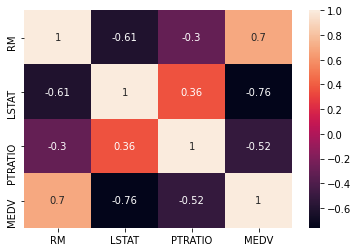

In [ ]:
# Observe correlation
correlation = housing.corr()
print(correlation)

# Plot correlation
sns.heatmap(correlation, annot=True)

COMMENTS:
- **MEDV** has a moderately negative relationship with **PTRATIO** (-0.52)
- **MEDV** has a strongly negative relationship with **LSTAT** (-0.76)
- **MEDV** has a strongly positive relationship with **RM** (0.7)

DETAILS:
- Obviously, in the pure relationship between RM and MEDV (PTRATIO and LSTAT are constant), the higher RM is, the higher MEDV raise. In other words, more rooms mean that more space and area are added to the house, which leads to an increase in its price

- In contrast, in the pure relationship, also, higher LSTAT definitely makes MEDV lower. The higher the poverty rate a neighborhood is, the harder and more negative considerations individuals have in terms of the environment for children to grow or simply the safety when they live in the high-poverty area, etc.

- Also in the pure relationship, the higher LSTAT is, the lower MEDV is observed. The lower number of students per teacher is significantly better because the students will be paid more care and attention by their teacher, have more opportunities to interact with their teacher as well as more effectively approach the knowledge.

# Step 2: Get to know our performance Metric

Do a quick overview on Mean Absolute Error (MAE), because that is going to be the metric we are going to use for this task.

**Example**: Calculate MAE on these data points by using the Sklearn library
```python
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0, 2.1, 7.8, 5.3]
```
If a model is making these prediction (y_pred), is this a good model?

In [ ]:
y_true = pd.DataFrame(np.array([[3, -0.5, 2, 7, 4.2]]))
y_pred = pd.DataFrame(np.array([[2.5, 0, 2.1, 7.8, 5.3]]))

In [ ]:
print(y_true)
print(y_pred)

     0     1    2    3    4
0 3.00 -0.50 2.00 7.00 4.20
     0    1    2    3    4
0 2.50 0.00 2.10 7.80 5.30


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

0.5999999999999999

`"mean_absolute_error = 0.5999999999999999"` implies that, on average, the difference between the true and the predicted values is ~0.6. The result presents an interestingly low loss for a fairly good model.

On the other hand, just having the information of the pair of y_true and y_pred, except code, so we are not able to know whether the model has been updated enough and whether there is still any ideally lowest loss?

# Step 3: Train our machine learning model

Your task is to build a pipeline to preprocess this data and train a linear regression model to predict the house price. Make sure to follow all the recommended practices we mention in class. 

Here are 2 pipelines you should implement 
- The first pipeline include: MinMaxScaler (or Standard Scaler) as **Transformer** (to preprocess), and Linear Regression as **Estimator** (machine learning model)

- The second pipeline include: Polynomial Feature, **then** Standard Scaler as **Transformers**, and Linear Regression as **Estimator**. Pay attention that you have 2 transformers in a very specific order.






In [ ]:
# Define your first pipeline here
linear_pipeline = Pipeline([('scale_by_min_max', MinMaxScaler()),
                            ('model_1', LinearRegression())])

In [ ]:
# Define your second pipeline here
poly_pipeline = Pipeline([('poly_feature', PolynomialFeatures()),
                          ('scale_by_standard', StandardScaler()),
                          ('model_2', LinearRegression())])

## Part 1: Use a simple train-test split

*Do these following step for the first pipeline only*:

- Use sklearn `train_test_split` to split data into train set and test set. Use random_state = 42
- Fit the pipeline on train set
- Use pipline to predict the test set
- Calculate the MAE on test set

In [ ]:
# Split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(housing.drop(columns='MEDV'),
                                                    housing['MEDV'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
x_train.head()

,RM,LSTAT,PTRATIO
325,5.87,9.80,20.20
140,6.17,24.16,21.20
433,6.75,17.44,20.20
416,6.44,16.22,20.20
487,6.79,6.48,21.00


In [ ]:
# Overview x_train
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 325 to 102
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       391 non-null    float64
 1   LSTAT    391 non-null    float64
 2   PTRATIO  391 non-null    float64
dtypes: float64(3)
memory usage: 12.2 KB


In [ ]:
# Overview x_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 451 to 398
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       98 non-null     float64
 1   LSTAT    98 non-null     float64
 2   PTRATIO  98 non-null     float64
dtypes: float64(3)
memory usage: 3.1 KB


In [ ]:
# Overview y_train
y_train.head()

325   409500.00
140   294000.00
433   281400.00
416   300300.00
487   462000.00
Name: MEDV, dtype: float64

In [ ]:
# Overview y_test
y_test.head()

451   401100.00
84    501900.00
434   319200.00
472   147000.00
428   247800.00
Name: MEDV, dtype: float64

In [ ]:
# Fit x_train
x_train_trained = linear_pipeline.fit(x_train, y_train)

In [ ]:
# Overview transformed x_train
linear_pipeline['scale_by_min_max'].transform(x_train)

array([[0.47715526, 0.21728258, 0.80851064],
       [0.54021087, 0.6162823 , 0.91489362],
       [0.65908621, 0.42956377, 0.80851064],
       ...,
       [0.52739301, 0.29702695, 0.80851064],
       [0.56563986, 0.42484023, 0.80851064],
       [0.58796775, 0.24034454, 0.88297872]])

In [ ]:
# Predict y_train set
y_train_pred_1 = linear_pipeline.predict(x_train)

# Predict y_test set
y_test_pred_1 = linear_pipeline.predict(x_test)

In [ ]:
# Calculate MAE
loss = mean_absolute_error(y_test, y_test_pred_1)
loss

64277.288656703386

## Part 2: Use 5 fold cross-validation without polynomial features

In this part we will not do a simple train-test split. Instead, we will do 

1.   List item
2.   List item

train-test split 5 times and then calculate the mean of the MAE score for these 5 test set.

In [ ]:
# 5 fold cross-validation without Polynomial Features
without_poly = cross_val_score(linear_pipeline, housing.drop(columns='MEDV'), housing['MEDV'], scoring="neg_mean_absolute_error", cv=5) * np.array(-1)
print(without_poly)

loss_1 = np.mean(without_poly)
print(loss_1)

[43813.0860629  72928.11409471 95899.64728565 80260.79735502
 83546.26020565]
75289.58100078856


## Part 3: Use 5 fold cross-validation with polynomial features

Repeat everything done in **Part 2** on the second pipeline (The one with Polynomial Feature as one of the transformer). For this one, write a `for` loop to test out different degree for Polynomial Feature. Here is roughly what your code should look like
```
for each value n in a range of our choice:
    - create a pipeline including Polynomial Feature(degree=n) => MinMaxScaler => Linear Regression
    - call cross_val_score on this pipeline
    - calculate mean of MAE scores from cross validation
```



In [ ]:
for n in range (1, 4):
    poly_pipe = Pipeline([('polynomial', PolynomialFeatures(degree=n)),
                          ('scaler', MinMaxScaler()),
                          ('model_3', LinearRegression())])
    with_poly = cross_val_score(poly_pipe, housing.drop(columns='MEDV'), housing['MEDV'], scoring="neg_mean_absolute_error", cv=5)
    with_poly = with_poly * np.array(-1)
    print(with_poly)

loss_2 = np.mean(with_poly)
loss_2

[35384.88017358 87992.17228758 58956.91386363 69818.8419022
 59955.72923423]


62421.707492244735

### TRY WITH **GridSearchCV**

In [ ]:
A = housing.drop(columns='MEDV')

In [ ]:
B = housing['MEDV']

*Bonus*: after you finish this lab, go back to this question, and consider a better way to search for the best degree by using gridsearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'poly_feature__degree' : range(1, 11)}
grid_cv = GridSearchCV(estimator=poly_pipeline, param_grid=parameters, scoring='neg_mean_absolute_error', cv=KFold())
grid_cv.fit(A, B)
grid_cv.score(A, B)

0.8365792776805879

# Step 4: Reporting MAE

From part 2 and part 3, which pipeline ends up with the lowest mean MAE from cross validation? And what is that MAE?

- Between the two model, poly_pipe (second pipeline) have the lowest loss with more than 12000 lower than the linear_pipeline (first pipeline) in terms of the mean of the score calculated by 5 models.
> As a result, for further analysis, I would prefer to choose the Polynomial Features.

- MAE or mean absolute error, is the square root of MSE (mean square error) used as loss function to describe more detail in terms of predicted information of model and compare the difference between the values predicted by the model and the true values. This function has the same scale as our inputs and labels, therefore, MAE penalizes the model less than MSE.
> The lower MAE or MSE the model has, the more efficient and reliable predictions we receive.

# Step 5: Making predictions

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	|Client 2	|Client 3|
|-----------|-----------|-----------|--------|
|Total number of rooms in home	|5 rooms	|4 rooms	|8 rooms|
|Neighborhood poverty level (as %)	|17%	|32%	|3%|
|Student-teacher ratio of nearby schools	|15-to-1	|22-to-1	|12-to-1|

Based on your model, what price would you recommend each client sell his/her home at?


Note that at this point, you haven't had a trained model to make the prediction on this data. So we will create a pipeline and train it.

To do this question, you need to
- Redefine the best pipeline that you report in step 4
- **Fit** this pipeline on the entire dataset given at the beginning (we don't need to do train/test split here as we already know this is our best pipeline)
- Manually create a new test data including 3 clients from the table above
- Use the pipeline you have fitted to **predict** this new test data
- Save the prediction to a variable called `client_preds`

In [ ]:
# Define features and price for model trainning
Features = housing.drop(columns='MEDV', axis=1)
Price = housing['MEDV']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

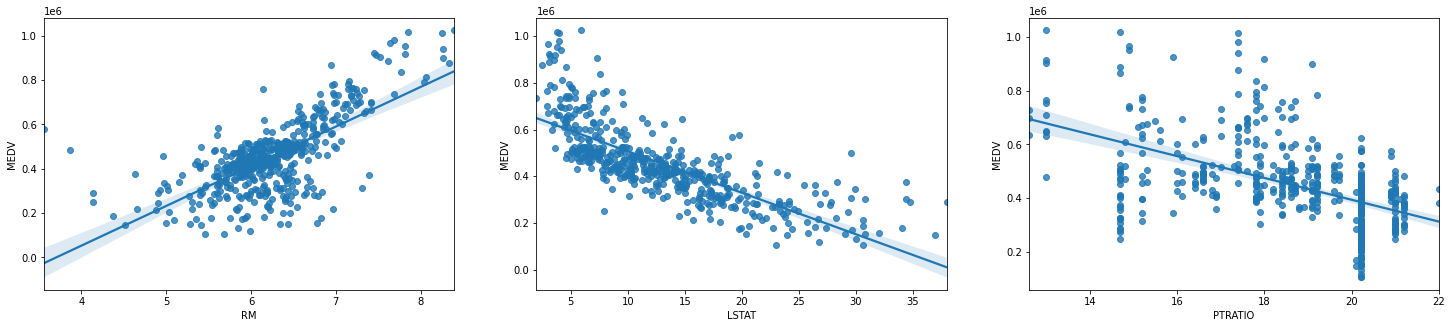

In [ ]:
# Plot the relationships
plt.figure(figsize=(25,5))

plt.subplot(131)
sns.regplot(housing['RM'], Price)

plt.subplot(132)
sns.regplot(housing['LSTAT'], Price)

plt.subplot(133)
sns.regplot(housing['PTRATIO'], Price)

plt.plot()

In [ ]:
# Define training pipeline
poly_pipeline = Pipeline([('poly_features', PolynomialFeatures()),
                          ('scale_by_standard', StandardScaler()),
                          ('model', LinearRegression())])

In [ ]:
# Train price prediction model
trained_model = poly_pipeline.fit(Features, Price)

In [ ]:
# Create client dataset
client_test_set = pd.DataFrame(np.array([[5, 17, 15],
                                        [4, 32, 22],
                                        [8, 3, 12]]), columns = ['RM', 'LSTAT', 'PTRATIO'])
client_test_set

,RM,LSTAT,PTRATIO
0,5,17,15
1,4,32,22
2,8,3,12


In [ ]:
# Predict price for the 3 clients
client_preds = trained_model.predict(client_test_set)
client_preds

array([ 327950.18390708,  347416.94630115, 1020603.8898358 ])

In [ ]:
# Check for the median of price
np.median(Price)

438900.0

In [ ]:
# Check for the description of price
Price.describe()

count       489.00
mean     454342.94
std      165340.28
min      105000.00
25%      350700.00
50%      438900.00
75%      518700.00
max     1024800.00
Name: MEDV, dtype: float64

In [ ]:
# Overview client prediction result
client_result = pd.DataFrame(data=client_preds, columns=['Recommended Price'])
client_result = pd.concat([client_result, client_test_set], axis=1)
client_result = client_result.rename(index={0:'Client 1', 1:'Client 2', 2: 'Client 3'})
client_result

,Recommended Price,RM,LSTAT,PTRATIO
Client 1,327950.18,5,17,15
Client 2,347416.95,4,32,22
Client 3,1020603.89,8,3,12


After you have your variable `client_preds`, run this code to visualize your predictions against the home prices (MEDV)

```python
import matplotlib.pyplot as plt
for i,price in enumerate(client_preds):
    plt.hist(y, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)
```

Note that 
- `client_preds` should be a vector of size 3 (since we only have 3 records in the new test set) 
- `y` should be the column MEDV in the dataset you use to train

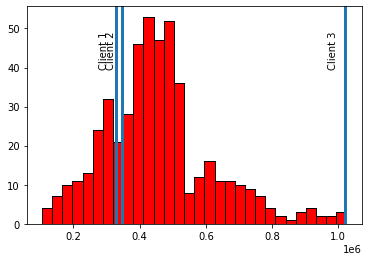

In [ ]:
import matplotlib.pyplot as plt
for i,price in enumerate(client_preds):
    plt.hist(Price, bins = 30,color='r',ec='black')
    plt.axvline(price, lw = 3)
    plt.text(price-50000, 40, 'Client '+str(i+1), rotation=90)

Do these prices seem reasonable given the values for the respective features?

- Both Client 1 and Client 2 have suggestions of the under-mean-and-median price, which is independently appropriate, in general. However, if we have a back and forth look at the features (RM, LSTAT, and PTRATIO), there is a conflict in the system's suggestions. In detail, the price of client 2 is higher than client 1. Client 1 not only has one room more than client 2 but also seems to be the average poverty (17%) with a lower ratio of students and teachers (15:1) while client 2 is considered to be the high poverty class (32%) with a higher ratio of students and teachers (22:1).

- Around one million is the price suggested for client 3 which is reasonably suitable for many aspects: the total number of rooms is 8, both the poverty percentage (3%) and the ratio of students and teachers (12:1) are low which defines this client as a wealthy neighborhood.

In a nutshell, client 3 has the most reasonable suggestion. On the other hand, the model should be updated to have a more appropriate price for clients 1 and 2.

# Step 6: Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

EXPLORATION:
- The dataset collected in 1978 is not really relevant to today's reality for many reasons such as the difference in both internal and external elements such as opinion, housing choosing standard, behavior, financial status, economic situations, inflation, crisis, etc. In detail, due to much inflation throughout the past, especially, one of the largest with long-term effect was the global housing crisis in 2008, or the crisis of real estates this 2021, makes the price many times exaggerate which fluctuates sharply and hard to predict.

- The chosen features used in this prediction are actually ineffective and not enough in describing a home, especially for pricing objectives. For instead, the house parameters such as area, facilities, etc. should be considered to be significant sufficient for one to make the decision in trading the house.

- According to the prediction that we have gone through, the model still has to update a lot in order to prevent conflicts as well as make better and more persuasive predictions (for example the price conflict between clients 1 and 2). Moreover, citizens in different regions have their own specific habits and behavior as well as the population density and the local community standards are unfamiliar, also. As a result, before starting to make any model or prediction, it is extremely important to have the target research objects directly contact and collect data. Additionally, it would be more interesting to collect enough qualified data in both areas to figure out the differences between the two.

- Although the living environment will have its own impacts on the price of every house inside, it is not enough. Instead, the quality of the house (age of the house, house equipment, add-in facilities, etc.) is still much more important. The more advantages a house brings to its owner, the more persuasively higher price it has.